# **Numerical Analysis Term Project - MAT353**

## Numerical Simulation of the 1D Heat Equation Using Finite Difference Methods

**Student:** Mert Eldemir  
**Student Number:** 25120205086  


---


### Project Overview

On that project, we will study the numerical solutions of the **one-dimensional heat equation**, which models the diffusion of temperature along a 1D rod over the time.  

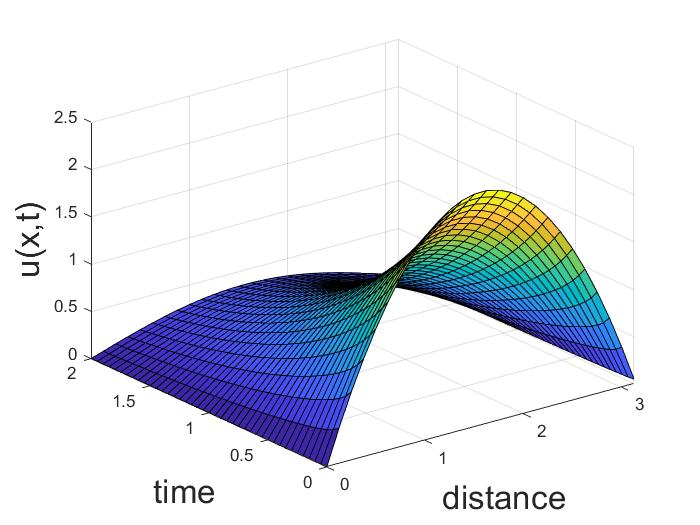

The continuous partial differential equation is approximated using **finite difference methods**, and different numerical schemes are compared in terms of **stability, accuracy, and convergence**.



## 1. Mathematical Model: The 1D Heat Equation

Here is the one-dimensional heat equation, which describe how the temperature changes along a rod over time due to diffusion:

$$
\frac{\partial u(x,t)}{\partial t}
=
\alpha \frac{\partial^2 u(x,t)}{\partial x^2},
\quad 0 < x < L,\; t > 0
$$

where:
- $u(x,t)$ is the temperature at position $x$ and time $t$,
- $\alpha > 0$ is the thermal diffusivity coefficient,
- $L$ is the length of the rod.

### Initial Conditions

The initial temperature distribution along the rod is chosen as:

$$
u(x,0) = \sin\!\left(\frac{\pi x}{L}\right)
$$

This represents a rod that is hottest in the middle and cold at both ends.

### Boundary Conditions

The ends of the rod are held at zero temperature:

$$
u(0,t) = 0, \quad u(L,t) = 0 \quad \text{for all } t \ge 0
$$

These **Dirichlet boundary conditions** model a rod whose ends are connected to perfect heat sinks.


## 2. Discretization of Space and Time

To solve this 1D heat equation numerically, the continuous spatial and temporal domains
are replaced by discrete grids.

### Spatial Grid

The rod of length $L$ is divided into $N$ equal intervals with spacing:

$$
\Delta x = \frac{L}{N}
$$

The spatial grid points are defined as:

$$
x_i = i \Delta x, \quad i = 0,1,\dots,N
$$

### Time Grid

Time is discretized using a time step size $\Delta t$, giving time levels:

$$
t^n = n \Delta t, \quad n = 0,1,2,\dots
$$

### Discrete Solution Notation

The numerical approximation of the temperature is denoted by:

$$
u_i^n \approx u(x_i, t^n)
$$

That is, $u_i^n$ represents the temperature at spatial point $x_i$
and time level $t^n$.


In [72]:
# importing the main libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
# Physical parameters
L = 1.0        # len of the rod
alpha = 1.0    # thermal diffusivity coeff

# Numerical Parameters
N = 50         # spatial intervals
dx = L / N     # step size

dt = 0.0001    # Time step size
T = 0.1        # Final simulation time

# Derived quantities
x = np.linspace(0, L, N + 1)  # Spatial grid


## 3. Initial and Boundary Conditions (Implementation)

We initialize the temperature profile at time $t=0$ as:

$$
u(x,0) = \sin\left(\frac{\pi x}{L}\right)
$$

In discrete form, this becomes:

$$
u_i^0 = \sin\left(\frac{\pi x_i}{L}\right)
$$

We also enforce Dirichlet boundary conditions at all times:

$$
u_0^n = 0, \quad u_N^n = 0
$$


In [74]:
# Initial condition: u(x,0) = sin(pi x / L)
u0 = np.sin(np.pi * x / L)

# Enforce boundary conditions explicitly (should already be 0 for sine but enforce anyway)
u0[0] = 0.0
u0[-1] = 0.0

#We enforce u0[0]=0 and u0[-1]=0 because the rod ends are fixed at 0°C


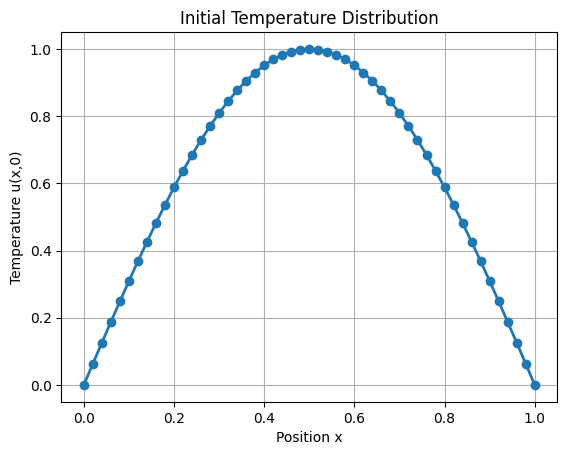

In [75]:
plt.figure()
plt.plot(x, u0, marker='o', linewidth=2)
plt.xlabel("Position x")
plt.ylabel("Temperature u(x,0)")
plt.title("Initial Temperature Distribution")
plt.grid(True)
plt.show()


## 4. FTCS (Forward Time–Centered Space) Method

To derive a numerical scheme for the heat equation, we replace the continuous derivatives
by finite difference approximations.

### Time Derivative Approximation

The time derivative at position $x_i$ and time $t^n$ is approximated using a forward difference:

$$
\frac{\partial u}{\partial t}(x_i, t^n)
\approx
\frac{u_i^{n+1} - u_i^n}{\Delta t}
$$

This represents the change in temperature over one time step.

---

### Spatial Second Derivative Approximation

The second spatial derivative is approximated using a centered difference:

$$
\frac{\partial^2 u}{\partial x^2}(x_i, t^n)
\approx
\frac{u_{i-1}^n - 2u_i^n + u_{i+1}^n}{(\Delta x)^2}
$$

This term measures the local curvature of the temperature profile and governs heat diffusion.

---

### Discrete Heat Equation

Substituting these approximations into the heat equation

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$$

gives:

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t}
=
\alpha
\frac{u_{i-1}^n - 2u_i^n + u_{i+1}^n}{(\Delta x)^2}
$$

Multiplying both sides by $\Delta t$:

$$
u_i^{n+1} - u_i^n
=
\alpha \frac{\Delta t}{(\Delta x)^2}
\left(
u_{i-1}^n - 2u_i^n + u_{i+1}^n
\right)
$$

Rearranging, we obtain the explicit update formula:

$$
u_i^{n+1}
=
u_i^n
+
r \left(
u_{i-1}^n - 2u_i^n + u_{i+1}^n
\right)
$$

where the dimensionless parameter

$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}
$$

controls the stability of the method.

---

### Boundary Conditions

The update formula is applied only to interior points:

$$
i = 1,2,\dots,N-1
$$

while the boundary values are fixed for all time steps:

$$
u_0^n = 0, \quad u_N^n = 0.
$$


In [76]:
# Compute the FTCS stability parameter
r = alpha * dt / dx**2
print("FTCS stability parameter r =", r)

# One FTCS time-step: u^0 -> u^1
u = u0.copy()                 # u represents the current time level (n)
u_next = u.copy()             # u_next will store the next time level (n+1)

# Update only interior points: i = 1 ... N-1
for i in range(1, N):
    u_next[i] = u[i] + r * (u[i-1] - 2*u[i] + u[i+1])

# Enforce boundary conditions explicitly
u_next[0] = 0.0
u_next[-1] = 0.0


FTCS stability parameter r = 0.25


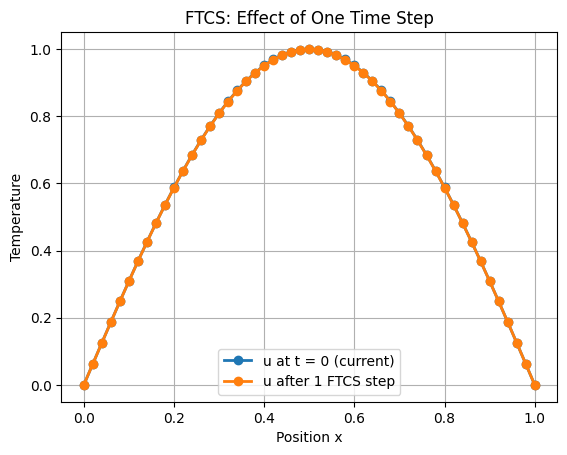

In [77]:
plt.figure()
plt.plot(x, u, marker='o', linewidth=2, label="u at t = 0 (current)")
plt.plot(x, u_next, marker='o', linewidth=2, label="u after 1 FTCS step")
plt.xlabel("Position x")
plt.ylabel("Temperature")
plt.title("FTCS: Effect of One Time Step")
plt.grid(True)
plt.legend()
plt.show()


## 5. FTCS Solver Over a Time Interval

To simulate heat diffusion over the time interval $[0, T]$, we repeatedly apply the FTCS update rule.
If $\Delta t$ is the time step size, the number of time steps is:

$$
M = \frac{T}{\Delta t}
$$

We then compute $u^n$ for $n = 0,1,2,\dots,M$ using the same FTCS update formula at each step.


In [78]:
# Number of time steps
M = int(T / dt)
print("Number of time steps M =", M)

# Choose a few time indices to save for plotting (snapshots)
snapshot_times = [0, int(0.25*M), int(0.5*M), int(0.75*M), M]
snapshot_labels = ["t=0", "t=0.25T", "t=0.5T", "t=0.75T", "t=T"]

# M tells us how many times we apply the FTCS update.


Number of time steps M = 1000


In [79]:
u = u0.copy()
snapshots = [u.copy()]  # store u at t=0

for n in range(1, M + 1): # outer loop = time
    u_next = u.copy()

    # update interior points
    for i in range(1, N): # inner loop = space
        u_next[i] = u[i] + r * (u[i-1] - 2*u[i] + u[i+1])

    # boundary conditions
    u_next[0] = 0.0
    u_next[-1] = 0.0

    # move forward in time
    u = u_next

    # save snapshots when n matches desired snapshot times
    if n in snapshot_times[1:]:
        snapshots.append(u.copy())


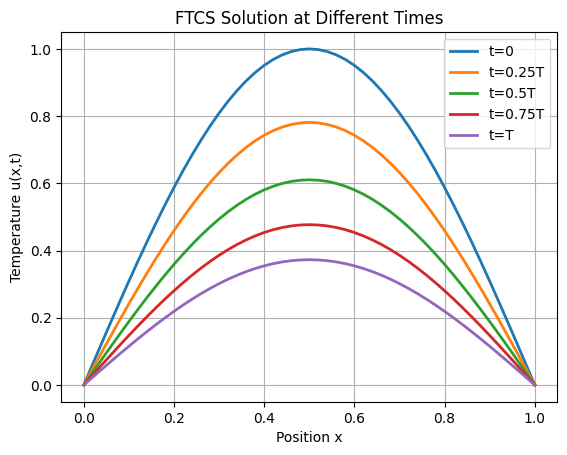

In [80]:
plt.figure()
for profile, label in zip(snapshots, snapshot_labels):
    plt.plot(x, profile, linewidth=2, label=label)

plt.xlabel("Position x")
plt.ylabel("Temperature u(x,t)")
plt.title("FTCS Solution at Different Times")
plt.grid(True)
plt.legend()
plt.show()


## Interpretation of the FTCS Time Integration Results

In the previous code cells, the explicit FTCS (Forward Time–Centered Space) method was applied
repeatedly to simulate the evolution of temperature along the rod over the time interval
$[0, T]$.

The total simulation time $T$ is divided into small time steps of size $\Delta t$, resulting in

$$
M = \frac{T}{\Delta t}
$$

time iterations. At each time step, the temperature at the interior grid points is updated
according to the FTCS formula

$$
u_i^{n+1}
=
u_i^n
+
r \left( u_{i-1}^n - 2u_i^n + u_{i+1}^n \right),
\quad r = \alpha \frac{\Delta t}{(\Delta x)^2},
$$

while the boundary conditions $u_0^n = u_N^n = 0$ are enforced at all times.

This procedure numerically approximates the solution of the heat equation by advancing the
temperature profile step by step in time. To visualize the diffusion process, the temperature
distribution is stored and plotted at several representative time instances:
$t = 0$, $0.25T$, $0.5T$, $0.75T$, and $T$.

The resulting plot demonstrates the physical behavior of heat diffusion:
the temperature profile maintains its smooth, sine-like shape while its amplitude decreases
monotonically over time. This indicates that heat flows from the hotter central region toward
the colder boundaries, and the overall temperature decays due to the imposed zero-temperature
boundary conditions.

The absence of oscillations or unbounded growth confirms that the stability condition
$r \le 1/2$ is satisfied, and that the FTCS scheme produces a stable and physically meaningful
numerical solution for the chosen discretization parameters.


## 6. Exact (Analytical) Solution for Validation

For the heat equation with Dirichlet boundary conditions

$$
u(0,t)=0,\quad u(L,t)=0,
$$

and the initial condition

$$
u(x,0)=\sin\left(\frac{\pi x}{L}\right),
$$

the exact solution is known and given by:

$$
u_{\text{exact}}(x,t)
=
\exp\left(-\alpha \left(\frac{\pi}{L}\right)^2 t\right)
\sin\left(\frac{\pi x}{L}\right).
$$

We use this closed-form solution to validate the FTCS numerical solution by comparing them at the final time $t=T$.


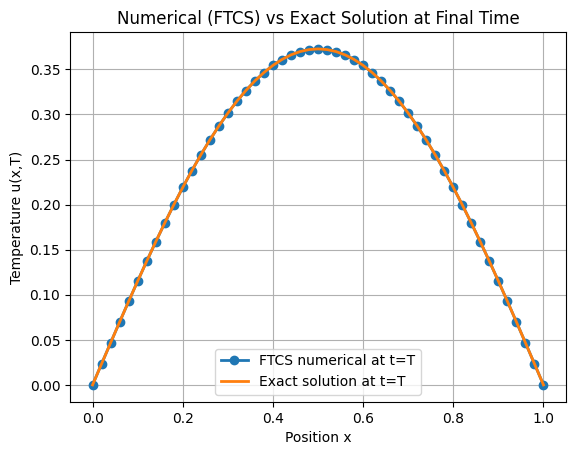

In [81]:
# Exact solution at final time T for the chosen initial condition sin(pi x / L)
u_exact_T = np.exp(-alpha * (np.pi / L)**2 * T) * np.sin(np.pi * x / L)

# Numerical solution at final time T:
# In our loop, 'u' ended as the final state at t = T
u_num_T = u.copy()

plt.figure()
plt.plot(x, u_num_T, marker='o', linewidth=2, label="FTCS numerical at t=T")
plt.plot(x, u_exact_T, linewidth=2, label="Exact solution at t=T")
plt.xlabel("Position x")
plt.ylabel("Temperature u(x,T)")
plt.title("Numerical (FTCS) vs Exact Solution at Final Time")
plt.grid(True)
plt.legend()
plt.show()

## Comparison of FTCS Numerical Solution with Exact Solution

In this section, the numerical solution obtained using the FTCS (Forward Time–Centered Space)
method is compared with the exact analytical solution of the one-dimensional heat equation
at the final simulation time $t = T$.

The exact solution for the chosen initial condition
$u(x,0) = \sin\left(\frac{\pi x}{L}\right)$
is given by

$$
u_{\text{exact}}(x,t)
=
\exp\left(-\alpha \left(\frac{\pi}{L}\right)^2 t\right)
\sin\left(\frac{\pi x}{L}\right).
$$

The plotted results show that the FTCS numerical solution overlaps almost perfectly with the
exact solution over the entire spatial domain. This behavior is expected for several reasons:
the initial condition corresponds to a single eigenmode of the heat equation, the stability
condition of the FTCS scheme is satisfied, and sufficiently small spatial and temporal step
sizes are used.

The close agreement between the two solutions confirms the correctness and accuracy of the
numerical implementation. Minor discrepancies that may exist are due to discretization
(truncation) errors inherent in finite difference methods, but these errors are negligible
for the chosen parameters.

This comparison serves as a validation step, demonstrating that the FTCS method successfully
reproduces the analytical solution of the heat equation for this test case.


## 7. Error Analysis at Final Time

To quantify the accuracy of the FTCS method, we compute the pointwise error at the final time:

$$
e_i = u_{\text{num}}(x_i, T) - u_{\text{exact}}(x_i, T).
$$

We report two common error measures:

#### Maximum absolute error (Infinity norm)

$$
\|e\|_{\infty} = \max_{0 \le i \le N} |e_i|.
$$

#### Root-Mean-Square (RMS) error (discrete $L_2$-type)

$$
\text{RMS}(e)
=
\sqrt{\frac{1}{N+1}\sum_{i=0}^{N} e_i^2 }.
$$

The RMS error behaves like a discrete version of an $L_2$ norm and summarizes the average magnitude of the error across the spatial grid.


In [82]:
# Pointwise error at t = T
error = u_num_T - u_exact_T

# Infinity norm (max absolute error)
err_inf = np.max(np.abs(error))

# Discrete RMS (L2-type) error
err_l2 = np.sqrt(np.mean(error**2))

print("Error analysis at t = T")
print("Max abs error (L_inf) =", err_inf)
print("RMS error (L2-type)   =", err_l2)


Error analysis at t = T
Max abs error (L_inf) = 6.051956893593502e-05
RMS error (L2-type)   = 4.237217353747975e-05


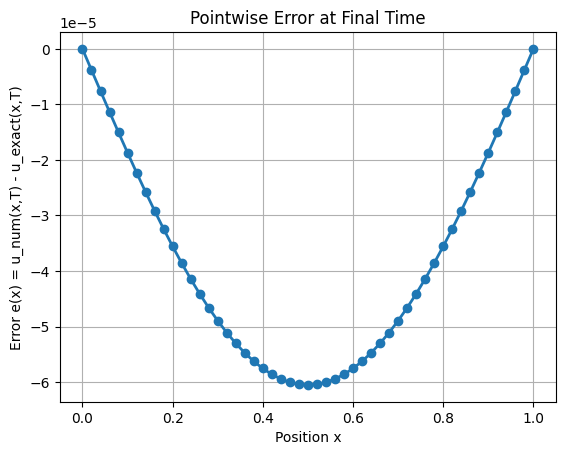

In [83]:
plt.figure()
plt.plot(x, error, marker='o', linewidth=2)
plt.xlabel("Position x")
plt.ylabel("Error e(x) = u_num(x,T) - u_exact(x,T)")
plt.title("Pointwise Error at Final Time")
plt.grid(True)
plt.show()


## Interpretation of the Error Results

The figure shows the pointwise error at the final time:

$$
e(x_i) = u_{\text{num}}(x_i, T) - u_{\text{exact}}(x_i, T).
$$

The error is close to zero at the boundaries because both the numerical and exact solutions
satisfy the same Dirichlet boundary conditions $u(0,t)=u(L,t)=0$ for all $t$.
The error magnitude becomes larger toward the middle of the rod, where the temperature is
highest and the solution curvature is strongest; discretization (truncation) errors typically
become most visible in such regions.

The reported error norms summarize accuracy quantitatively:
- The maximum absolute error captures the worst-case deviation over all grid points.
- The RMS error captures the average error magnitude across the spatial grid.

For the chosen discretization parameters, both errors are small (on the order of $10^{-5}$),
confirming that the FTCS implementation is stable and accurately reproduces the analytical
solution for this test problem.


## 8. Convergence Study (Grid Refinement)

To study convergence, we solve the same problem using several spatial resolutions.
For each grid size $N$, we compute the numerical solution at $t=T$ and measure the error
against the analytical solution.

We also select the time step $\Delta t$ to satisfy the FTCS stability requirement by using a
fixed safety factor (target $r$ value):

$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}.
$$

As the grid is refined ($\Delta x$ decreases), a consistent method should produce smaller
errors, demonstrating convergence.


In [84]:
def ftcs_solve_and_error(N, T=0.1, L=1.0, alpha=1.0, r_target=0.4):
    """
    Solve 1D heat equation using FTCS for u(x,0)=sin(pi x/L), u(0,t)=u(L,t)=0.
    Returns dx, dt, Linf error, RMS error at t=T.
    """
    dx = L / N
    x = np.linspace(0, L, N + 1)

    # stable dt from target r
    dt = r_target * dx**2 / alpha

    # make M an integer and adjust dt so we land exactly on T
    M = int(np.ceil(T / dt))
    dt = T / M  # adjusted
    r = alpha * dt / dx**2

    # initial condition
    u = np.sin(np.pi * x / L)
    u[0] = 0.0
    u[-1] = 0.0

    # time stepping
    for _ in range(M):
        u_next = u.copy()
        for i in range(1, N):
            u_next[i] = u[i] + r * (u[i-1] - 2*u[i] + u[i+1])
        u_next[0] = 0.0
        u_next[-1] = 0.0
        u = u_next

    # exact at t=T
    u_exact = np.exp(-alpha * (np.pi / L)**2 * T) * np.sin(np.pi * x / L)

    error = u - u_exact
    err_inf = np.max(np.abs(error))
    err_rms = np.sqrt(np.mean(error**2))
    return dx, dt, r, err_inf, err_rms


In [85]:
N_list = [25, 50, 100, 200]
results = []

for Ntest in N_list:
    dx, dt_used, r_used, err_inf, err_rms = ftcs_solve_and_error(
        N=Ntest, T=T, L=L, alpha=alpha, r_target=0.4
    )
    results.append((Ntest, dx, dt_used, r_used, err_inf, err_rms))

print("Convergence results (FTCS at t=T)")
print("N     dx        dt        r        Linf_error      RMS_error")
for (Ntest, dx, dt_used, r_used, err_inf, err_rms) in results:
    print(f"{Ntest:<5d} {dx:<9.6f} {dt_used:<9.6f} {r_used:<8.4f} {err_inf:<14.6e} {err_rms:<.6e}")


Convergence results (FTCS at t=T)
N     dx        dt        r        Linf_error      RMS_error
25    0.040000  0.000637  0.3981   6.722720e-04   4.670584e-04
50    0.020000  0.000160  0.4000   1.695161e-04   1.186850e-04
100   0.010000  0.000040  0.4000   4.236174e-05   2.980562e-05
200   0.005000  0.000010  0.4000   1.058936e-05   7.469156e-06


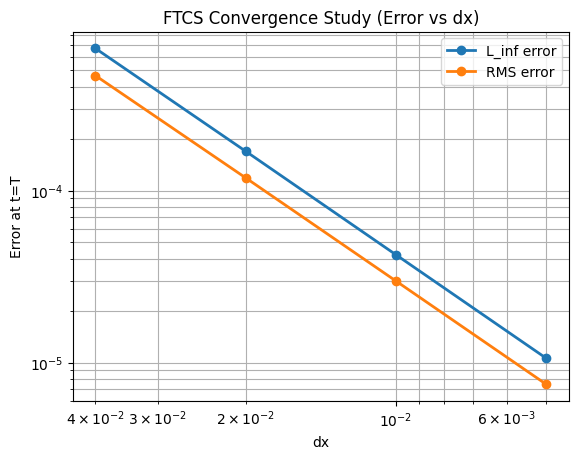

In [86]:
dx_vals = np.array([row[1] for row in results])
err_inf_vals = np.array([row[4] for row in results])
err_rms_vals = np.array([row[5] for row in results])

plt.figure()
plt.loglog(dx_vals, err_inf_vals, marker='o', linewidth=2, label="L_inf error")
plt.loglog(dx_vals, err_rms_vals, marker='o', linewidth=2, label="RMS error")
plt.gca().invert_xaxis()  # smaller dx to the right (optional visual)
plt.xlabel("dx")
plt.ylabel("Error at t=T")
plt.title("FTCS Convergence Study (Error vs dx)")
plt.grid(True, which="both")
plt.legend()
plt.show()


## Interpretation of the Convergence Results

The convergence study investigates how the numerical error behaves as the spatial grid is
refined. The same physical problem is solved using the FTCS method for different grid sizes,
while the time step is chosen to satisfy the FTCS stability condition.

Both the maximum error and the RMS error decrease systematically as the spatial step size
$\Delta x$ is reduced. When $\Delta x$ is halved, the error decreases by approximately a factor
of four, indicating second-order convergence with respect to space.

The log–log plot of error versus $\Delta x$ exhibits an approximately linear trend, confirming
a power-law relationship between error and grid spacing. This behavior is consistent with the
theoretical accuracy of the FTCS scheme, which uses a second-order central difference
approximation for the spatial derivative.

These results demonstrate that the FTCS method is convergent and that the numerical
implementation accurately approximates the analytical solution as the grid is refined.
